# Python files that contains sklearn

### We search through all python files that are not a fork of sklearn (by repo_name and path), and count how many files contain 'sklearn' in the content.

In [3]:
from bigquery_python_framework.GithubPython import GithubPython

In [12]:
pythonFilesThatContainsSklearn = """\
SELECT
    COUNT(*) count
FROM
    [scikit-learn-research.pyfiles.content_py]
WHERE
    (NOT sample_repo_name CONTAINS "scikit-learn") AND
    (NOT sample_repo_name CONTAINS "sklearn") AND
    (NOT sample_path CONTAINS "scikit-learn") AND
    (NOT sample_path CONTAINS "sklearn") AND
    (REGEXP_MATCH(content, r'from sklearn.*? import .+') OR
    REGEXP_MATCH(content, r'import sklearn'))
"""

In [23]:
result = GithubPython().run(pythonFilesThatContainsSklearn)

In [24]:
sklearnFile = result[0][0]

### How many python files in total?

In [30]:
howManyPythonFiles = """\
SELECT
    COUNT(*) count
FROM
    [scikit-learn-research.pyfiles.content_py]
WHERE
    (NOT sample_repo_name CONTAINS "scikit-learn") AND
    (NOT sample_repo_name CONTAINS "sklearn") AND
    (NOT sample_path CONTAINS "scikit-learn") AND
    (NOT sample_path CONTAINS "sklearn")
"""
totalFile = GithubPython().run(howManyPythonFiles)[0][0]

In [19]:
import matplotlib.pyplot as plt

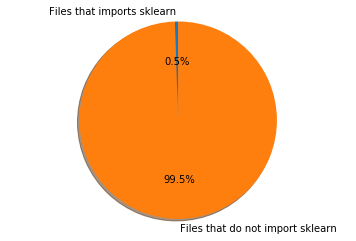

In [31]:
labels = 'Files that imports sklearn', 'Files that do not import sklearn'
sizes = [sklearnFile, totalFile-sklearnFile]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Repo that imports sklearn the most

### The most is in terms of number of lines

In [32]:
from bigquery_python_framework.GithubPython import GithubPython

In [34]:
repoThatImportsSklearnTheMostQuery = """\
SELECT
  repo_name,
  COUNT(*) count
FROM (
    SELECT
      SPLIT(content, '\n') line,
      repo_name
    FROM
      [scikit-learn-research.pyfiles.content_py_full]
    WHERE
      (NOT repo_name CONTAINS "scikit-learn") AND
      (NOT repo_name CONTAINS "sklearn") AND
      (NOT path CONTAINS "scikit-learn") AND
      (NOT path CONTAINS "sklearn")
    HAVING
      REGEXP_MATCH(line, r'from sklearn.*? import .+') OR
      REGEXP_MATCH(line, r'import sklearn')
)
GROUP BY
  1
ORDER BY
  count DESC
"""

repoThatImportsSklearnTheMost = GithubPython().run(repoThatImportsSklearnTheMostQuery)

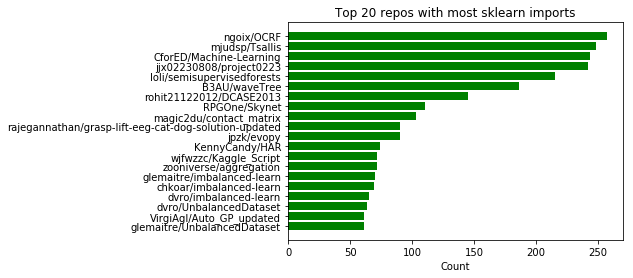

In [41]:
fig, ax = plt.subplots()

# Example data
repos = [repo for repo, _ in repoThatImportsSklearnTheMost[:20]]
y_pos = range(len(repos))
count = [count for _, count in repoThatImportsSklearnTheMost[:20]]

ax.barh(y_pos, count, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(repos)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Top 20 repos with most sklearn imports')

plt.show()

### It seems that filtering sklearn forks by path and repo_name is not good enough. For example, jjx02230808/project0223 is indeed a fork of sklearn. Although we exclude counting of files that has sklearn in the path, this repo still ranks high because it contains all sklearn examples. For those, they do not have "sklearn" in the path. See https://github.com/jjx02230808/project0223/blob/master/examples/calibration/plot_calibration.py for example

## Detail look of files that import sklearn

In [42]:
repoAndPathThatImportsSklearnQuery = """\
SELECT
  repo_name,
  path
FROM (
    SELECT
      SPLIT(content, '\n') line,
      repo_name,
      path
    FROM
      [scikit-learn-research.pyfiles.content_py_full]
    WHERE
      (NOT repo_name CONTAINS "scikit-learn") AND
      (NOT repo_name CONTAINS "sklearn") AND
      (NOT path CONTAINS "scikit-learn") AND
      (NOT path CONTAINS "sklearn")
    HAVING
      REGEXP_MATCH(line, r'from sklearn.*? import .+') OR
      REGEXP_MATCH(line, r'import sklearn')
)
"""

repoAndPathThatImportsSklearn = GithubPython().run(repoAndPathThatImportsSklearnQuery)

In [129]:
def getGithubURL(result):
    for repo_name, path in result:
        print("https://github.com/{}/tree/master/{}".format(repo_name,path))

### Below is a list of GitHub urls that import "sklearn"

In [46]:
getGithubURL(repoAndPathThatImportsSklearn)

https://github.com/kadubarbosa/hydramuse/tree/master/mcmc_analysis.py
https://github.com/dtrckd/pymake/tree/master/pymake/script/generate.py
https://github.com/rahulk90/inference_introspection/tree/master/expt/evaluateJac.py
https://github.com/Cadene/keras/tree/master/examples/kaggle_otto_nn.py
https://github.com/ibayer/fastFM/tree/master/fastFM/bpr.py
https://github.com/JVP3122/Python-Machine-Learning-NFL-Game-Predictor/tree/master/v1/multi_class.py
https://github.com/ernfrid/skll/tree/master/examples/make_example_boston_data.py
https://github.com/SnippyHolloW/contextual_word_segmentation/tree/master/src/plot_metrics.py
https://github.com/mbernico/skaro/tree/master/example/keras_mnist.py
https://github.com/armadill-odyssey/aima-python/tree/master/submissions/Ban/myNN.py
https://github.com/ngoix/OCRF/tree/master/examples/datasets/plot_iris_dataset.py
https://github.com/DistrictDataLabs/yellowbrick/tree/master/tests/test_cluster/test_silhouette.py
https://github.com/stephenliu1989/msmbu

# Most common models

### What are the most common submodule imported?

In [48]:
mostImportedSubmoduleQuery="""\
SELECT
  REGEXP_EXTRACT(line, r'(from sklearn.*? import .+|import sklearn.*)'),
  COUNT(*) count
FROM (
    SELECT
      SPLIT(content, '\n') line,
      id
    FROM
      [scikit-learn-research:pyfiles.content_py] 
    WHERE
      (NOT sample_repo_name CONTAINS "scikit-learn") AND
      (NOT sample_repo_name CONTAINS "sklearn") AND
      (NOT sample_path CONTAINS "scikit-learn") AND
      (NOT sample_path CONTAINS "sklearn")
)
GROUP BY
  1
ORDER BY
  count DESC
"""
mostImportedSubmodule = GithubPython().run(mostImportedSubmoduleQuery)

In [49]:
# Let's clean up the suffix \r, etc.
from collections import defaultdict
mostImportedSubmoduleDict = defaultdict(int)
for key,val in mostImportedSubmodule:
    if key == None: continue
    newKey = key.strip(" \r;")
    if "#" in newKey:
        newKey = newKey.split("#")[0]
    mostImportedSubmoduleDict[newKey]+=int(val)

### We provide a helper utility function, so if you want to have a GitHub url link for any of the result above, you may do queryByKeyword(regular_expression) 

In [65]:
def queryByKeyword(keyword):
    keywordQuery = GithubPython().run("""\
    SELECT
        sample_repo_name,
        sample_path
    FROM (
    SELECT
      SPLIT(content, '\n') line,
      sample_repo_name,
      sample_path
    FROM
      [scikit-learn-research:pyfiles.content_py] 
    WHERE
      (NOT sample_repo_name CONTAINS "scikit-learn") AND
      (NOT sample_repo_name CONTAINS "sklearn") AND
      (NOT sample_path CONTAINS "scikit-learn") AND
      (NOT sample_path CONTAINS "sklearn")
    HAVING
      REGEXP_MATCH(line, r'%s')
    )
    """ % keyword
    )
    return keywordQuery

### Example of showing all "import sklearn"

In [67]:
importSklearn = queryByKeyword('import sklearn$')

In [68]:
getGithubURL(importSklearn)

https://github.com/ceholden/glmnet-python/tree/master/glmnet/elastic_net.py
https://github.com/BenKaehler/q2-feature-classifier/tree/master/q2_feature_classifier/tests/test_taxonomic_classifier.py
https://github.com/indiependente/nextsong/tree/master/tsne.py
https://github.com/choldgraf/mne-python/tree/master/mne/cov.py
https://github.com/hlin117/statsmodels/tree/master/statsmodels/sandbox/examples/thirdparty/ex_ratereturn.py
https://github.com/aspiringguru/sentexTuts/tree/master/PracMachLrng/sentex_ML_demo3.py
https://github.com/kvh/ramp/tree/master/examples/iris.py
https://github.com/magic2du/contact_matrix/tree/master/Contact_maps/DeepLearning/DeepLearningTool/DL_contact_matrix_load2-new10fold_01_08_2015_parallel.py
https://github.com/wasiahmad/Paraphrase-Identification-Task/tree/master/code/input.py
https://github.com/MicrosoftResearch/Azimuth/tree/master/azimuth/models/ensembles.py
https://github.com/gskielian/Creating-a-Neural-Net-From-Scratch-With-Theano-Python/tree/master/01-ge

### Plotting most imported submodule (including all models, methods and submodules)

In [99]:
def barhplot(result, xlabel, title,  color='green'):
    fig, ax = plt.subplots()
    xs = [x for x, _ in result]
    y_pos = range(len(xs))
    ys = [y for _, y in result]
    ax.barh(y_pos, ys, align='center', color=color, ecolor='black')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(xs)
    ax.invert_yaxis()  # labels read top-to-bottom
    for i, v in enumerate(ys):
        ax.text(v + 3, i + .25, str(v), color=color)
    ax.set_xlabel(xlabel)
    ax.set_title(title)

    plt.show()

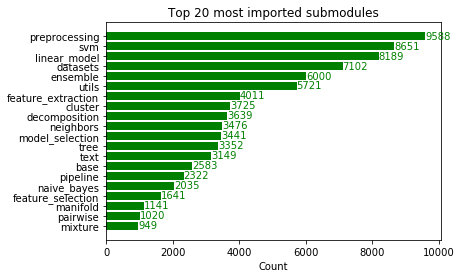

In [100]:
barhplot(mostImportedSubmodule[1:21], 'Count', 'Top 20 most imported submodules')

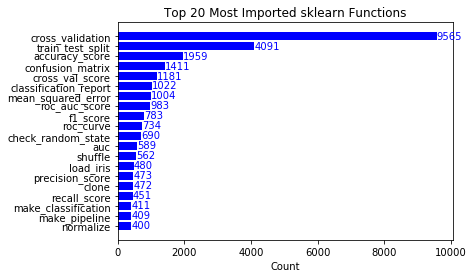

In [101]:
with open("sklearn_submodule_import/content_py/new/most_imported_function_cleaned.csv", "r") as f:
    mostImportedFunction = [(s.split(",")[0], int(s.split(",")[1][:-1]) if s.split(",")[1][:-1]!='' else 0 ) for s in f.readlines()]
barhplot(mostImportedFunction[:20], "Count", "Top 20 Most Imported sklearn Functions", "blue")

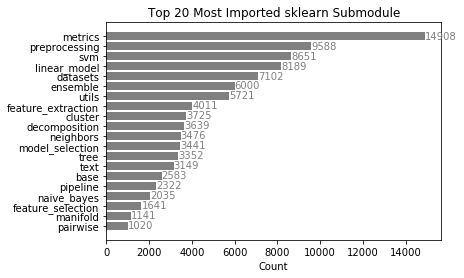

In [102]:
with open("sklearn_submodule_import/content_py/new/most_imported_submodule_cleaned.csv", "r") as f:
    mostImportedSubmodule = [(s.split(",")[0], int(s.split(",")[1][:-1]) if s.split(",")[1][:-1]!='' else 0 ) for s in f.readlines()]
barhplot(mostImportedSubmodule[:20], "Count", "Top 20 Most Imported sklearn Submodule", "gray")

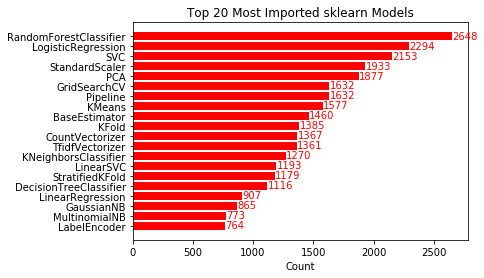

In [103]:
with open("sklearn_submodule_import/content_py/new/most_imported_model_cleaned.csv", "r") as f:
    mostImportedModel = [(s.split(",")[0], int(s.split(",")[1][:-1]) if s.split(",")[1][:-1]!='' else 0 ) for s in f.readlines()]
barhplot(mostImportedModel[:20], "Count", "Top 20 Most Imported sklearn Models", "red")

### Now we compare between python files and ipython notebooks:

In [85]:
with open("ipynb/sklearn_submodule_import/most_imported_model_cleaned.csv", "r") as f:
    mostImportedModelipynb = [(s.split(",")[0], int(s.split(",")[1][:-1]) if s.split(",")[1][:-1]!='' else 0 ) for s in f.readlines()]

with open("ipynb/sklearn_submodule_import/most_imported_function_cleaned.csv", "r") as f:
    mostImportedFunctionipynb = [(s.split(",")[0], int(s.split(",")[1][:-1]) if s.split(",")[1][:-1]!='' else 0 ) for s in f.readlines()]

with open("ipynb/sklearn_submodule_import/most_imported_submodule_cleaned.csv", "r") as f:
    mostImportedSubmoduleipynb = [(s.split(",")[0], int(s.split(",")[1][:-1]) if s.split(",")[1][:-1]!='' else 0 ) for s in f.readlines()]

In [94]:
def scatterPlotForPythonIpynbComparison(a,b,num):
    common_keys = list(set([key for key, _ in a[:num]]) & set([key for key, _ in b[:num]]))
    import numpy as np
    N = len(common_keys)
    x = [dict((key, val) for key, val in a)[key] for key in common_keys]
    y = [dict((key, val) for key, val in b)[key] for key in common_keys]
    colors = np.random.rand(N)

    fig, ax = plt.subplots()
    ax.scatter(x, y, s=10, c=colors)
    ax.set_xlabel('Python')
    ax.set_ylabel('ipynb')

    for i, txt in enumerate(common_keys):
        ax.annotate(txt, (x[i],y[i]))

    plt.show()

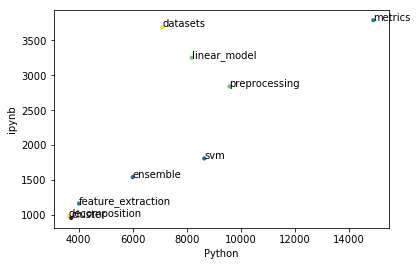

In [95]:
scatterPlotForPythonIpynbComparison(mostImportedSubmodule, mostImportedSubmoduleipynb, 10)

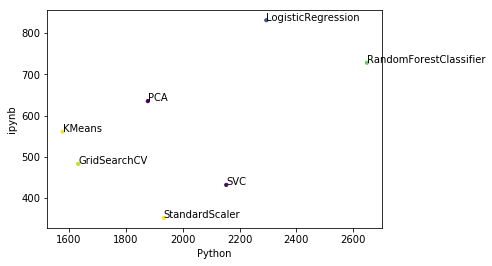

In [96]:
scatterPlotForPythonIpynbComparison(mostImportedModel, mostImportedModelipynb, 10)

# Context

### We want to examine the context of some code. For example, the code around the instantiation of a RandomForestClassifier.

In [107]:
# The getContext function can only return the first 
# occurence of modelName in each file
def getContext(modelName):
  from google.cloud import bigquery
  client = bigquery.Client()
  query = '''\
  #standardSQL
  CREATE TEMPORARY FUNCTION parsePythonFile(a STRING)
  RETURNS STRING
  LANGUAGE js AS """
    if (a === null) {
      return null;
    }
    var lines = a.split('\\\\n');
    for (i=0;i<lines.length;i++) {
      if (lines[i].indexOf("%s")!==-1){
        return lines.slice(Math.max(i-10,0),Math.min(i+10,lines.length-1)).join("\\\\n");
      }
    }
  """;

  CREATE TEMPORARY FUNCTION parsePythonFile2(a STRING, b STRING)
  RETURNS STRING
  LANGUAGE js AS """
    if (a === null) {
      return null;
    }
    var lines = a.split('\\\\n');
    for (i=0;i<lines.length;i++) {
      if (lines[i].indexOf("%s")!==-1){
        return b;
      }
    }
  """;

  SELECT
    parsePythonFile(content) match,
    parsePythonFile2(content,sample_path) path,
    parsePythonFile2(content,sample_repo_name) repo_name,
    count(*) count
  FROM   
    `scikit-learn-research.pyfiles.content_py` 
  WHERE
     STRPOS(sample_repo_name, 'sklearn') = 0
     AND STRPOS(sample_repo_name, 'scikit-learn') = 0
     AND STRPOS(sample_path,'sklearn') = 0
     AND STRPOS(sample_path,'scikit-learn') = 0
  GROUP BY
  1,2,3
  ORDER BY 
  count DESC
  '''% (modelName,modelName)
  result = client.run_sync_query(query)
  result.timeout_ms = 99999999
  result.run()
  return result.rows

In [108]:
rfcContext = getContext("RandomForestClassifier()")

In [124]:
def prettyPrintPythonCode(code):
    from pygments import highlight
    from pygments.lexers import PythonLexer
    from pygments.formatters import HtmlFormatter
    import IPython

    IPython.display.display(HTML('<style type="text/css">{}</style>{}'.format(
            HtmlFormatter().get_style_defs('.highlight'),
            highlight(code, PythonLexer(), HtmlFormatter()))))

In [139]:
def prettyPrintContext(context):
    i = 1
    for val, path, repo_name, count in context:
        print("%d."%i,)
        getGithubURL([(repo_name, path)])
        prettyPrintPythonCode(val)
        i +=1
    return

### Context for RandomForestClassifier

In [140]:
prettyPrintContext(rfcContext[1:20])

1.
https://github.com/ChristianSch/skml/tree/master/doc/auto_examples/example_br.py


2.
https://github.com/basvandenberg/spice/tree/master/spice/classification.py


3.
https://github.com/samfu1994/cs838webpage/tree/master/code/train_and_test.py


4.
https://github.com/slimn/Data-Analyst/tree/master/P5-Identify Fraud from Enron Email/poi_id.py


5.
https://github.com/Valay/cifar-10/tree/master/example/random_forest.py


6.
https://github.com/ricsoncheng/sarcasm_machine/tree/master/baseline.py


7.
https://github.com/neilpat1995/IMDb-Movie-Rating-Predictor/tree/master/random_forests.py


8.
https://github.com/reiinakano/scikit-plot/tree/master/examples/plot_feature_importances.py


9.
https://github.com/mickaellegal/HackerRank/tree/master/dota_2/dota2.py


10.
https://github.com/fridiculous/estimators/tree/master/tests/factories.py


11.
https://github.com/dmytroKarataiev/MachineLearning/tree/master/learning/ud120-projects/choose_your_own/your_algorithm.py


12.
https://github.com/mkery/CS349-roads/tree/master/Driver_val.py


13.
https://github.com/valisc/reverse-game-of-life/tree/master/reverse_game_of_life/classifier/global_classifier.py


14.
https://github.com/ianozsvald/featherweight_web_api/tree/master/example_iris.py


15.
https://github.com/jjardel/probablyPOTUS/tree/master/model/src/_model.py


16.
https://github.com/WING-NUS/corpSearch/tree/master/config.py


17.
https://github.com/deepchem/deepchem/tree/master/deepchem/models/tests/test_overfit.py


18.
https://github.com/afoss925/kaggle_schizophrenia_2014/tree/master/make_benchmarks.py


19.
https://github.com/georgetown-analytics/housing-risk/tree/master/code/prediction/run_models.py


### Context for SVC

In [142]:
prettyPrintContext(getContext("SVC()")[1:20])

1.
https://github.com/KellyChan/Kaggle/tree/master/kaggle-digit-recognizer/src/classify.py


2.
https://github.com/chkoar/imbalanced-learn/tree/master/imblearn/tests/test_pipeline.py


3.
https://github.com/zhangmianhongni/MyPractice/tree/master/Python/MachineLearning/A Dream in Red Mansions/test.py


4.
https://github.com/qwertzdenek/mtagger/tree/master/classifier.py


5.
https://github.com/ElvisLouis/code/tree/master/work/ML/tensorflow/separa/tool.py


6.
https://github.com/kaylanb/SkinApp/tree/master/machine_learn/HOG/calc_stats_for_HogMethod.py


7.
https://github.com/chrisjdavie/shares/tree/master/machine_learning/teaching_try1.py


8.
https://github.com/drewlinsley/draw_classify/tree/master/vis_classifier.py


9.
https://github.com/JessMcintosh/EMG-classifier/tree/master/Study/Test_07_copy/CrossValidate.py


10.
https://github.com/joergsimon/gesture-analysis/tree/master/analysis/Classification.py


11.
https://github.com/Raag079/self-driving-car/tree/master/Term01-Computer-Vision-and-Deep-Learning/P5-Vehicle-Detection/detection_functions/train_classifier.py


12.
https://github.com/AthenaSTM/ExperimentalMLScripts/tree/master/Scikit/Long/feature_selection.py


13.
https://github.com/iaroslav-ai/scikit-optimize/tree/master/benchmarks/bench_ml.py


14.
https://github.com/ppegusii/cs689-mini2/tree/master/src/python/clf.py


15.
https://github.com/orazaro/kgml/tree/master/kgml/plot_calibration_curve.py


16.
https://github.com/poldrack/openfmri/tree/master/openfmri_paper/9.1_classify_subjects_rand.py


17.
https://github.com/shahmohit/pynca/tree/master/src/nca.py


18.
https://github.com/tmills/uda/tree/master/scripts/eval_bootstrap.py


19.
https://github.com/dkdfirefly/speaker_project/tree/master/code/src/classify.py


# Instantiation

### Instantiation of RandomForestClassifier

In [206]:
def getInstantiation(modelName):
    instantiateQuery = """\
    SELECT
      REGEXP_EXTRACT(content, r'(%s *\(.*?\))') match,
      count(*) count
    FROM   
      [scikit-learn-research:pyfiles.content_py] 
    WHERE
      (NOT sample_repo_name CONTAINS "scikit-learn") AND
      (NOT sample_repo_name CONTAINS "sklearn") AND
      (NOT sample_path CONTAINS "scikit-learn") AND
      (NOT sample_path CONTAINS "sklearn")
    GROUP BY
    match
    HAVING
      (NOT match is NULL)
    ORDER BY
    count DESC
    """ % (modelName)
    return GithubPython().run(instantiateQuery)

In [207]:
rfcInst = getInstantiation("RandomForestClassifier")

In [208]:
rfcInst[:50]

[('RandomForestClassifier()', 361),
 ('RandomForestClassifier(n_estimators=100)', 132),
 ('RandomForestClassifier(random_state=0)', 56),
 ('RandomForestClassifier(n_estimators=10)', 52),
 ('RandomForestClassifier(n_estimators = 100)', 51),
 ('RandomForestClassifier(n_estimators=100, n_jobs=-1)', 44),
 ('RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)', 43),
 ('RandomForestClassifier(n_estimators=500)', 25),
 ('RandomForestClassifier(n_estimators=1000)', 19),
 ('RandomForestClassifier(n_estimators=50)', 18),
 ('RandomForestClassifier(n_classifiers)', 18),
 ('RandomForestClassifier(n_jobs=-1)', 17),
 ('RandomForestClassifier(**params)', 12),
 ('RandomForestClassifier(n_estimators=25)', 12),
 ('RandomForestClassifier(**kwargs)', 12),
 ("RandomForestClassifier(n_estimators=1, criterion='entropy', max_depth=1)",
  11),
 ('RandomForestClassifier(n_jobs=2)', 11),
 ('RandomForestClassifier(n_estimators=30)', 11),
 ('RandomForestClassifier(n_estimators=300, n_jobs=-1)', 10)

### When people use default param, do they use together with GridSearch?

In [221]:
def defaultInstantiationWithGridSearch(modelName):
    withGridSearch = """\
    SELECT
      COUNT(*) count from (
      SELECT
        REGEXP_EXTRACT(content, r'(%s *\(\))') match,
        content,
      FROM
        [scikit-learn-research:pyfiles.content_py]
      WHERE
        (NOT sample_repo_name CONTAINS "scikit-learn") AND
        (NOT sample_repo_name CONTAINS "sklearn") AND
        (NOT sample_path CONTAINS "scikit-learn") AND
        (NOT sample_path CONTAINS "sklearn") 
      )
    WHERE
      match!=""
      AND content CONTAINS 'GridSearchCV'
    """ % modelName
    withGridSearchNum = GithubPython().run(withGridSearch)[0][0]
    withoutGridSearch = """\
    SELECT
      COUNT(*) count from(
      SELECT
        REGEXP_EXTRACT(content, r'(%s *\(\))') match,
        content,
      FROM
        [scikit-learn-research:pyfiles.content_py]
      WHERE
        (NOT sample_repo_name CONTAINS "scikit-learn") AND
        (NOT sample_repo_name CONTAINS "sklearn") AND
        (NOT sample_path CONTAINS "scikit-learn") AND
        (NOT sample_path CONTAINS "sklearn")
      )
    WHERE
      match!=""
      AND NOT content CONTAINS 'GridSearchCV'
    """ % modelName
    withoutGridSearchNum = GithubPython().run(withoutGridSearch)[0][0]
    return (withGridSearchNum, withoutGridSearchNum)

In [222]:
rfcWithGridSearch, rfcWithoutGridSearch = defaultInstantiationWithGridSearch("RandomForestClassifier")

In [223]:
def plotPie(labels, sizes):
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()

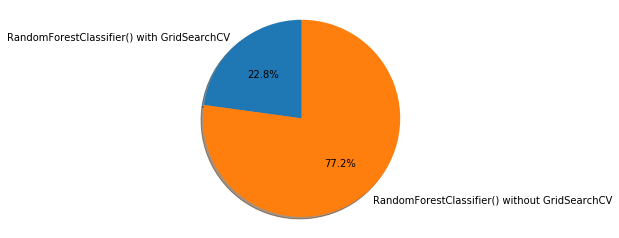

In [224]:
labels = 'RandomForestClassifier() with GridSearchCV', 'RandomForestClassifier() without GridSearchCV'
sizes = [rfcWithGridSearch, rfcWithoutGridSearch]
plotPie(labels,sizes)

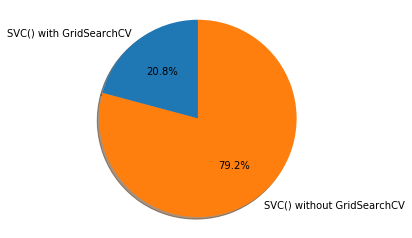

In [226]:
labels = 'SVC() with GridSearchCV', 'SVC() without GridSearchCV'
sizes = defaultInstantiationWithGridSearch('SVC')
plotPie(labels,sizes)

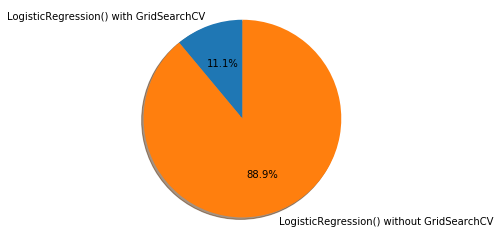

In [227]:
labels = 'LogisticRegression() with GridSearchCV', 'LogisticRegression() without GridSearchCV'
sizes = defaultInstantiationWithGridSearch('LogisticRegression')
plotPie(labels,sizes)